In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/Users/yunlingge/Documents/Ironhack/Week_1/Day_2/Afternoon/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv')
data.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


1. Show the dataframe shape.

In [3]:
display(data.shape)

(10910, 26)

2. Standardize header names.

In [4]:
data.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [5]:
data1=data.copy()

In [6]:
data1 = data1.drop(['Unnamed: 0'],axis=1)

In [7]:
data1.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [8]:
cols = []
for col in data1.columns:
  cols.append(col.lower().replace(' ', '_'))
data1.columns = cols

In [9]:
data1.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

3. Which columns are numerical?

In [10]:
data1.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
vehicle_type    

In [11]:
data1.select_dtypes(['int64','float64'])


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


4. Which columns are categorical?

In [12]:
data1.select_dtypes(['object'])

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


5. Check and deal with NaN values.

In [13]:
data1.isna().sum()

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [14]:
nulls_df = pd.DataFrame(round(data1.isna().sum()/len(data1),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df = nulls_df.rename(columns = {'index': 'header_name', 0:'percent_nulls'})
display(nulls_df.head())

,header_name,percent_nulls
0,customer,0.00
1,state,5.78
2,customer_lifetime_value,0.00
3,response,5.78
4,coverage,0.00


In [15]:
nulls_df

,header_name,percent_nulls
0,customer,0.00
1,state,5.78
2,customer_lifetime_value,0.00
3,response,5.78
4,coverage,0.00
5,education,0.00
6,effective_to_date,0.00
7,employmentstatus,0.00
8,gender,0.00
9,income,0.00


In [16]:
print(data1['months_since_last_claim'].value_counts())
print(data1['number_of_open_complaints'].value_counts())

3.0     426
6.0     394
1.0     386
7.0     378
4.0     373
2.0     368
5.0     355
0.0     354
10.0    346
16.0    333
11.0    331
15.0    323
13.0    320
8.0     315
12.0    307
17.0    299
14.0    299
9.0     277
23.0    276
19.0    276
25.0    269
21.0    267
18.0    257
20.0    254
22.0    246
24.0    237
29.0    234
28.0    227
31.0    221
26.0    211
27.0    208
30.0    201
34.0    199
33.0    198
35.0    157
32.0    155
Name: months_since_last_claim, dtype: int64
0.0    8160
1.0    1145
2.0     414
3.0     324
4.0     166
5.0      68
Name: number_of_open_complaints, dtype: int64


In [17]:
#Replacing 'months_since_last_claim' with median value 
median_months_since_last_claim = data1['months_since_last_claim'].median()
median_months_since_last_claim
data1['months_since_last_claim'] = data1['months_since_last_claim'].fillna(median_months_since_last_claim)

In [18]:
#Replacing 'number_of_open_complaints' with 0 becuase 0 is the most common/frequent value for this variable and median value is NaN.
data1['number_of_open_complaints'] = data1['number_of_open_complaints'].fillna(0)

In [19]:
#Replacing null value for categorical variables

In [20]:
display(data1['state'].unique())
display(data1['state'].value_counts())

array(['Arizona', 'California', 'Washington', 'Oregon', nan, 'Nevada'],
      dtype=object)

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: state, dtype: int64

In [21]:
data1['state'].mode()[0]

'California'

In [22]:
data1['state'] = data1['state'].fillna('California')
len(data[data1['state'].isna()==True])

0

In [23]:
display(data1['response'].value_counts())

No     8813
Yes    1466
Name: response, dtype: int64

In [24]:
data1['response'].mode()[0]

'No'

In [25]:
data1['response'] = data1['response'].fillna('No')
len(data1[data1['response'].isna()==True])

0

In [26]:
display(data1['vehicle_class'].value_counts())

Four-Door Car    5212
Two-Door Car     2118
SUV              2012
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: vehicle_class, dtype: int64

In [27]:
data1['vehicle_class'].mode()[0]

'Four-Door Car'

In [28]:
data1['vehicle_class'] = data1['vehicle_class'].fillna('Four-Door Car')
len(data1[data1['vehicle_class'].isna()==True])

0

In [29]:
display(data1['vehicle_type'].value_counts())

A    5428
Name: vehicle_type, dtype: int64

In [30]:
data1['vehicle_type'].mode()[0]

'A'

In [31]:
data1['vehicle_type'] =data1['vehicle_type'].fillna('A')
len(data1[data1['vehicle_type'].isna()==True])

0

In [32]:
display(data1['vehicle_size'].value_counts())

Medsize    7251
Small      1966
Large      1071
Name: vehicle_size, dtype: int64

In [33]:
data1['vehicle_size'].mode()[0]

'Medsize'

In [34]:
data1['vehicle_size'] = data1['vehicle_size'].fillna('Medsize')
len(data1[data1['vehicle_size'].isna()==True])

0

In [35]:
data1.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [36]:
# Extract the months from the dataset and store in a separate column
data1['month'] = pd.DatetimeIndex(data1['effective_to_date']).month
data1.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


In [37]:
filtered = data1[(data1['month']>=1)&(data1['month']<=3)]
filtered.head()
filtered['month'].unique()


array([2, 1])

7. BONUS: Put all the previously mentioned data transformations into a function.

In [38]:
def clean_dataset(data,cat_cols):
    data_cleaned = data.copy() 
    #Standardize column name
    cols = []
    for col in data_cleaned.columns:
        cols.append(col.lower().replace(' ', '_'))
    data_cleaned.columns = cols
    
    #Cleaning null value
    ###Replacing 'months_since_last_claim' with median value 
    median_months_since_last_claim = data_cleaned['months_since_last_claim'].median()
    data_cleaned['months_since_last_claim'] = data_cleaned['months_since_last_claim'].fillna(median_months_since_last_claim)
    ###Replacing 'number_of_open_complaints' with 0
    data_cleaned['number_of_open_complaints'] = data_cleaned['number_of_open_complaints'].fillna(0)
    ###Replacing null value for categorical variables
    for col in cat_cols:
        col_mode = data_cleaned[col].mode()[0]
        data_cleaned[col] = data_cleaned[col].fillna(col_mode)
    return data_cleaned

original = pd.read_csv('/Users/yunlingge/Documents/Ironhack/Week_1/Day_2/Afternoon/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv')
categorical_cols = ['state','response','vehicle_class','vehicle_type','vehicle_size']

data_cleaned = clean_dataset(data =original,cat_cols= categorical_cols)
    
    

In [39]:
data_cleaned.isna().sum()

unnamed:_0                       0
customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

# lab-customer-analysis-round-3

#### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
1. Show DataFrame info.
2. Describe DataFrame.
3. Show a plot of the total number of responses.
4. Show a plot of the response rate by the sales channel.
5. Show a plot of the response rate by the total claim amount.
6. Show a plot of the response rate by income.


1. Show DataFrame info.

In [40]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10910 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10910 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employmentstatus               10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

In [41]:
display(data1.shape)
data1.head()

(10910, 26)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


2. Describe DataFrame.

In [42]:
data1.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.082401,48.091934,0.361962,2.979193,434.888330,1.466728
std,6885.081434,30359.195670,34.442532,9.787208,27.940675,0.890134,2.399359,292.180556,0.498915
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


3. Show a plot of the total number of responses.
4. Show a plot of the response rate by the sales channel.
5. Show a plot of the response rate by the total claim amount.
6. Show a plot of the response rate by income.

In [43]:
#calculate response rate by the sales channel

In [44]:
data2=data1.copy()

In [45]:
 data2['sales_channel'].value_counts()

Agent          4121
Branch         3022
Call Center    2141
Web            1626
Name: sales_channel, dtype: int64

In [46]:
data2[data1['response']=='Yes']['sales_channel'].value_counts()

Agent          742
Branch         326
Call Center    221
Web            177
Name: sales_channel, dtype: int64

In [47]:
response_rate_per_channel = round((data2[data2['response']=='Yes']['sales_channel'].value_counts())\
                                /(data2['sales_channel'].value_counts()),2)
response_rate_per_channel 

Agent          0.18
Branch         0.11
Call Center    0.10
Web            0.11
Name: sales_channel, dtype: float64

In [48]:
type(response_rate_per_channel) 

pandas.core.series.Series

In [49]:
df_rr_sales_channel = response_rate_per_channel.to_frame() #convert pandas series to data frame
df_rr_sales_channel.rename(columns={'sales_channel':'response_rate'},inplace=True)
df_rr_sales_channel


,response_rate
Agent,0.18
Branch,0.11
Call Center,0.10
Web,0.11


In [50]:
#calculate response rate by total_claim_amount; I will divide total_claim_amount into three intervals as follows.

(array([2.928e+03, 5.667e+03, 1.529e+03, 4.680e+02, 2.200e+02, 4.300e+01,
        3.300e+01, 1.500e+01, 5.000e+00, 2.000e+00]),
 array([9.90070000e-02, 2.89413074e+02, 5.78727141e+02, 8.68041208e+02,
        1.15735528e+03, 1.44666934e+03, 1.73598341e+03, 2.02529748e+03,
        2.31461154e+03, 2.60392561e+03, 2.89323968e+03]),
 <BarContainer object of 10 artists>)

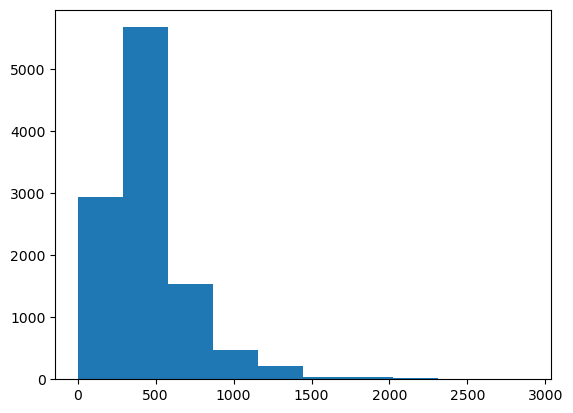

In [51]:
import matplotlib.pyplot as plt
plt.hist(data2.total_claim_amount) # this step is to know the range of dividing total_claim_amout

In [52]:
data2['total_claim_amount'].apply(lambda x: '<500' if x <500  else('500-1000' if (x>=500) & (x<=1000) else '>1000')) 

0            <500
1        500-1000
2            <500
3            <500
4        500-1000
           ...   
10905       >1000
10906        <500
10907        <500
10908    500-1000
10909       >1000
Name: total_claim_amount, Length: 10910, dtype: object

In [53]:
#Add a new column called 'claim_interval'

In [54]:
data2['claim_interval']= data2['total_claim_amount']\
                        .apply(lambda x: '<500' if x <500  else('500-1000' if (x>=500) & (x<=1000) else '>1000')) 

In [55]:
data2['claim_interval'].value_counts()

<500        7397
500-1000    3022
>1000        491
Name: claim_interval, dtype: int64

In [56]:
data2[data2['response']=='Yes']['claim_interval'].value_counts()

<500        942
500-1000    457
>1000        67
Name: claim_interval, dtype: int64

In [57]:
response_rate_per_claim_interval = round((data2[data2['response']=='Yes']['claim_interval'].value_counts())\
                                /(data2['claim_interval'].value_counts()),2)
response_rate_per_claim_interval 

<500        0.13
500-1000    0.15
>1000       0.14
Name: claim_interval, dtype: float64

In [58]:
df_rr_claim_amount = response_rate_per_claim_interval.to_frame() #convert pandas series to data frame
df_rr_claim_amount.rename(columns={'claim_interval':'response_rate'},inplace=True)
df_rr_claim_amount

,response_rate
<500,0.13
500-1000,0.15
>1000,0.14


In [59]:
#calculate response rate by income; I will divide income into three intervals as follows.

(array([2787.,  632., 1632., 1070.,  881.,  938.,  931.,  834.,  649.,
         556.]),
 array([    0. ,  9998.1, 19996.2, 29994.3, 39992.4, 49990.5, 59988.6,
        69986.7, 79984.8, 89982.9, 99981. ]),
 <BarContainer object of 10 artists>)

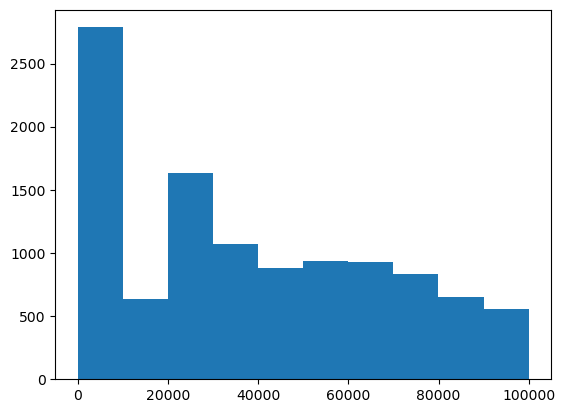

In [60]:
plt.hist(data2.income)

In [61]:
data2['income'].apply(lambda x: 'Low' if x <40000  else('Middle' if (x>=40000) & (x<=80000) else 'High')) 

0        Middle
1           Low
2           Low
3        Middle
4           Low
          ...  
10905       Low
10906    Middle
10907       Low
10908    Middle
10909       Low
Name: income, Length: 10910, dtype: object

In [62]:
data2['income_level'] = data2['income'].apply(lambda x: 'Low' if x <40000  else('Middle' if (x>=40000) & (x<=80000) else 'High')) 

In [63]:
data2['income_level'].value_counts()

Low       6121
Middle    3584
High      1205
Name: income_level, dtype: int64

In [64]:
data2[data2['response']=='Yes']['income_level'].value_counts()

Low       861
Middle    480
High      125
Name: income_level, dtype: int64

In [65]:
response_rate_per_income_level = round((data2[data2['response']=='Yes']['income_level'].value_counts())\
                                /(data2['income_level'].value_counts()),2)
response_rate_per_income_level 

Low       0.14
Middle    0.13
High      0.10
Name: income_level, dtype: float64

In [66]:
df_rr_income = response_rate_per_income_level.to_frame() #convert pandas series to data frame
df_rr_income.rename(columns={'income_level':'response_rate'},inplace=True)
df_rr_income

,response_rate
Low,0.14
Middle,0.13
High,0.10


In [67]:
#Put four plots together

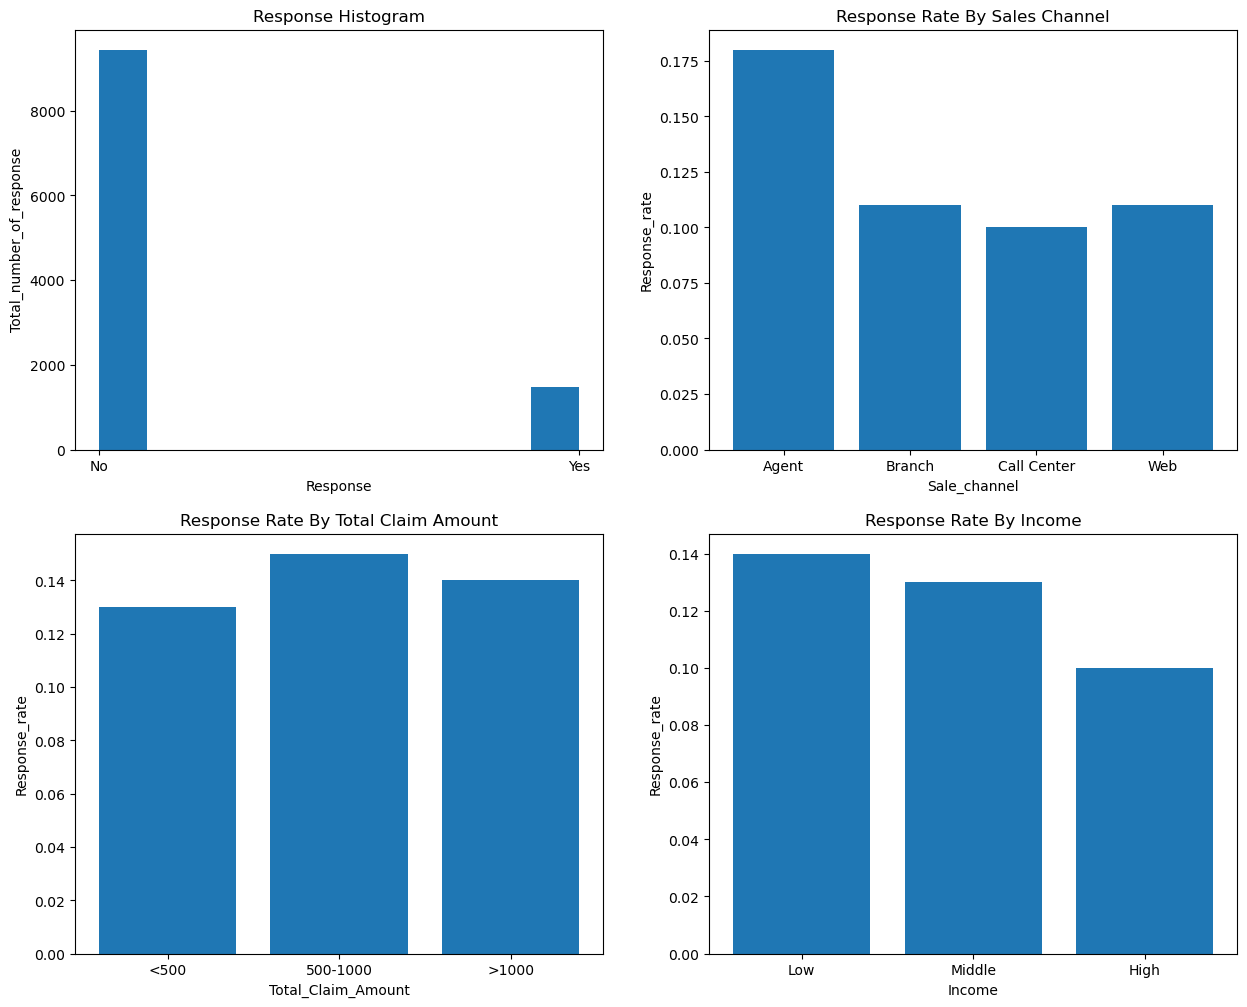

In [68]:
import matplotlib.pyplot as plt
fig,ax =plt.subplots(2,2,figsize=(15,12))
ax[0,0].hist(data2['response'],bins=10)
ax[0,0].set_xlabel('Response')
ax[0,0].set_ylabel('Total_number_of_response')
ax[0,0].set_title('Response Histogram')

ax[0,1].bar(x=df_rr_sales_channel.index, height=df_rr_sales_channel.response_rate)
ax[0,1].set_xlabel('Sale_channel')
ax[0,1].set_ylabel('Response_rate')
ax[0,1].set_title('Response Rate By Sales Channel')

ax[1,0].bar(x=df_rr_claim_amount.index, height=df_rr_claim_amount.response_rate)
ax[1,0].set_xlabel('Total_Claim_Amount')
ax[1,0].set_ylabel('Response_rate')
ax[1,0].set_title('Response Rate By Total Claim Amount')

ax[1,1].bar(x=df_rr_income.index, height=df_rr_income.response_rate)
ax[1,1].set_xlabel('Income')
ax[1,1].set_ylabel('Response_rate')
ax[1,1].set_title('Response Rate By Income')

plt.show()



# lab-customer-analysis-round-4

#### Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [69]:
data1.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
vehicle_type    

In [70]:
numerical = data1.select_dtypes(np.number)
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,9025.067525,23675,117,14.0,31,0.0,7,707.925645,1
...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,14.0,40,0.0,7,1214.400000,1
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849,2


In [71]:
categoricals = data1.select_dtypes(np.object_)
categoricals

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,A
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,A
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,A
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


#### Now we will try to check the normality of the numerical variables visually
 - Use seaborn library to construct distribution plots for the numerical variables
 - Use Matplotlib to construct histograms
 - Do the distributions for different numerical variables look like a normal distribution

-  Use seaborn library to construct distribution plots for the numerical variables

In [72]:
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,9025.067525,23675,117,14.0,31,0.0,7,707.925645,1


In [73]:
import seaborn as sns

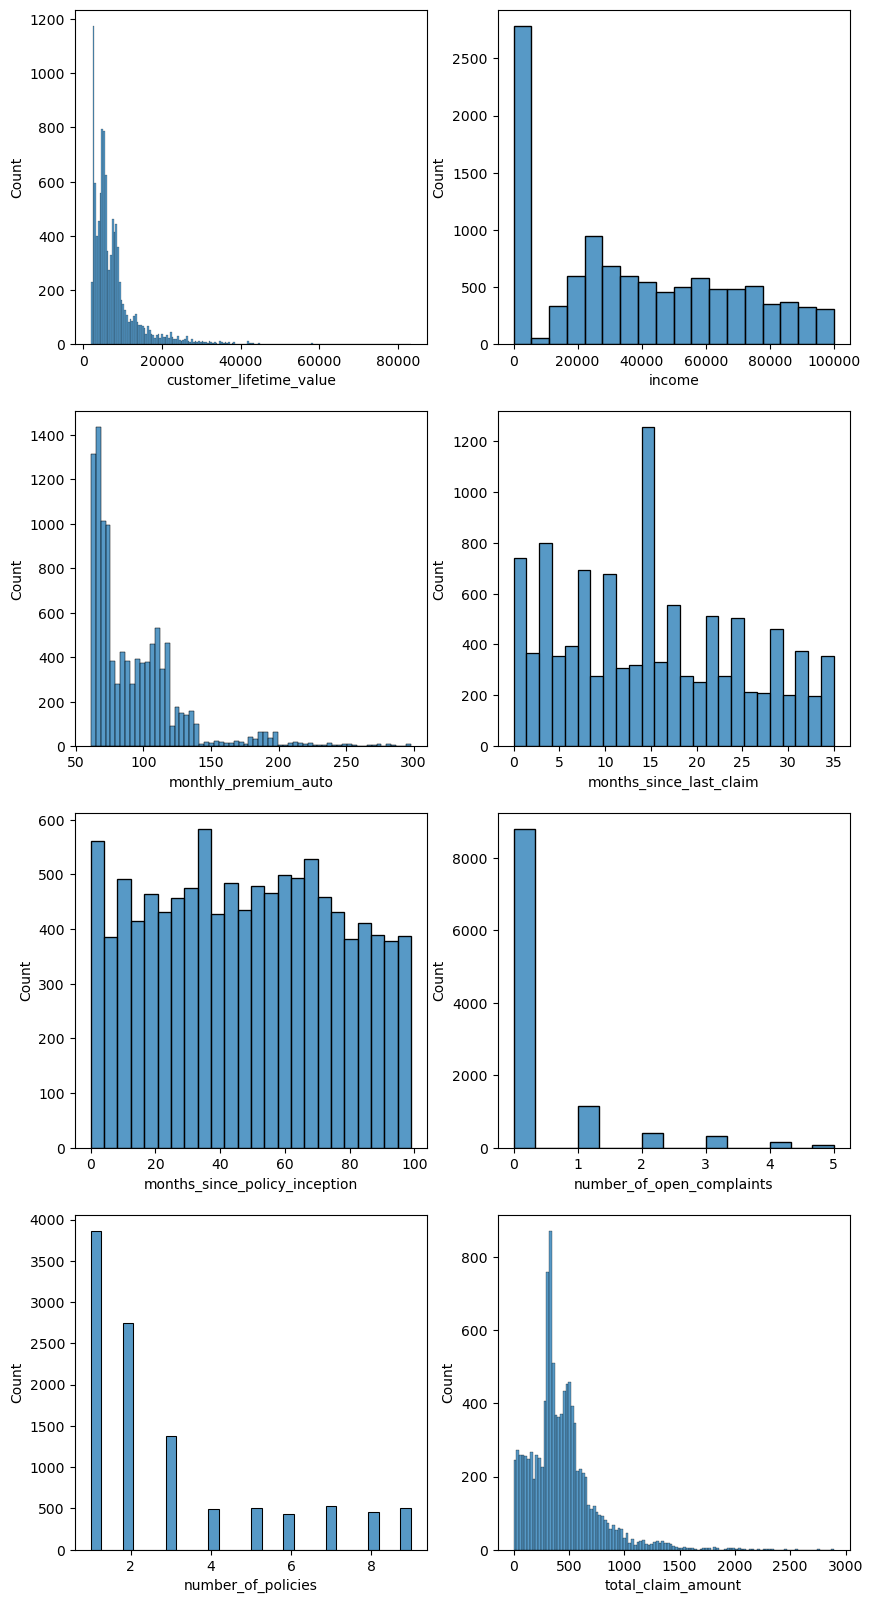

In [74]:
fig,ax = plt.subplots(4,2,figsize=(10,20))
sns.histplot(data2['customer_lifetime_value'],ax= ax[0,0])
sns.histplot(data2['income'],ax= ax[0,1])
sns.histplot(data2['monthly_premium_auto'],ax= ax[1,0])
sns.histplot(data2['months_since_last_claim'],ax= ax[1,1])
sns.histplot(data2['months_since_policy_inception'],ax= ax[2,0])
sns.histplot(data2['number_of_open_complaints'],ax= ax[2,1])
sns.histplot(data2['number_of_policies'],ax= ax[3,0])
sns.histplot(data2['total_claim_amount'],ax= ax[3,1])

plt.show()

- Use Matplotlib to construct histograms

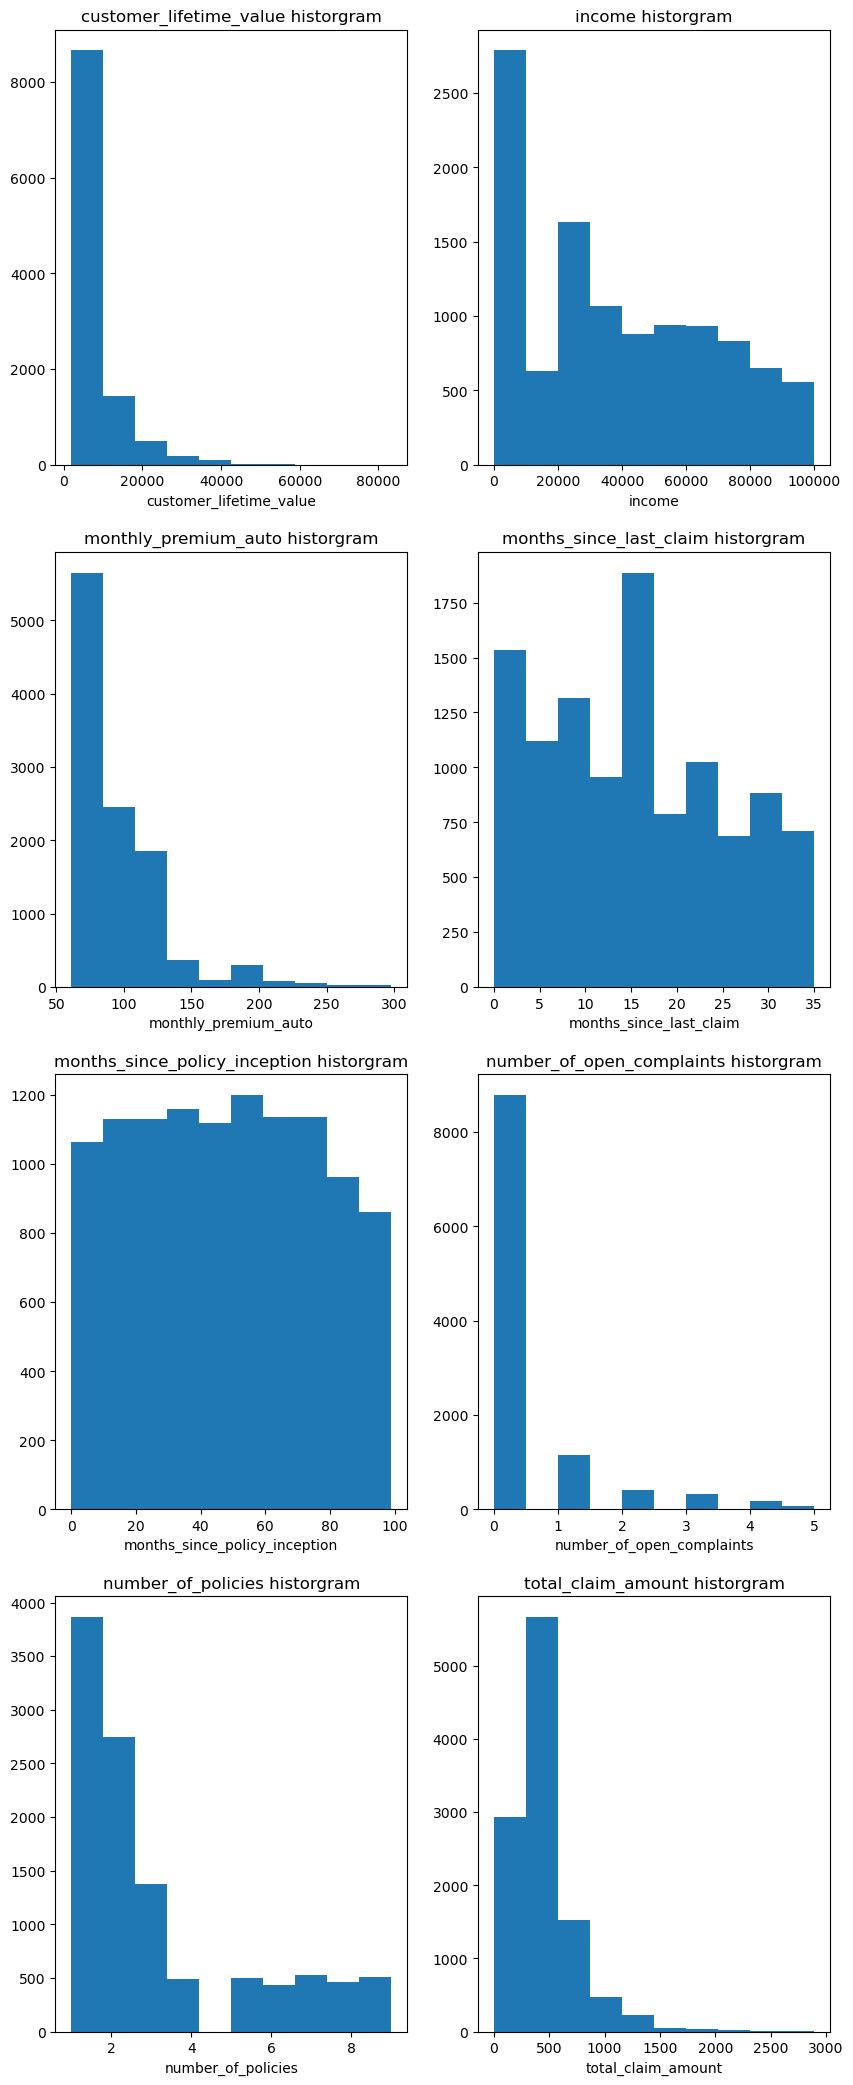

In [75]:
fig,ax= plt.subplots(4,2,figsize=(10,26))
ax[0,0].hist(data2['customer_lifetime_value'])
ax[0,0].set_xlabel('customer_lifetime_value')
ax[0,0].set_title('customer_lifetime_value historgram')

ax[0,1].hist(data2['income'])
ax[0,1].set_xlabel('income')
ax[0,1].set_title('income historgram')

ax[1,0].hist(data2['monthly_premium_auto'])
ax[1,0].set_xlabel('monthly_premium_auto')
ax[1,0].set_title('monthly_premium_auto historgram')

ax[1,1].hist(data2['months_since_last_claim'])
ax[1,1].set_xlabel('months_since_last_claim')
ax[1,1].set_title('months_since_last_claim historgram')

ax[2,0].hist(data2['months_since_policy_inception'])
ax[2,0].set_xlabel('months_since_policy_inception')
ax[2,0].set_title('months_since_policy_inception historgram')

ax[2,1].hist(data2['number_of_open_complaints'])
ax[2,1].set_xlabel('number_of_open_complaints')
ax[2,1].set_title('number_of_open_complaints historgram')

ax[3,0].hist(data2['number_of_policies'])
ax[3,0].set_xlabel('number_of_policies')
ax[3,0].set_title('number_of_policies historgram')

ax[3,1].hist(data2['total_claim_amount'])
ax[3,1].set_xlabel('total_claim_amount')
ax[3,1].set_title('total_claim_amount historgram')

plt.show()


- Do the distributions for different numerical variables look like a normal distribution

In [76]:
# No. None of them look like a normal distribution.

#### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [77]:
numerical.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
customer_lifetime_value,1.000000,0.028306,0.403069,0.015874,0.016960,-0.030616,0.016024,0.232626,-0.009234
income,0.028306,1.000000,-0.009788,-0.022708,-0.005903,0.008425,-0.009960,-0.354141,-0.000443
monthly_premium_auto,0.403069,-0.009788,1.000000,0.008489,0.018953,-0.010059,-0.020505,0.631799,0.007253
months_since_last_claim,0.015874,-0.022708,0.008489,1.000000,-0.038157,0.005004,0.006807,0.012340,-0.019666
months_since_policy_inception,0.016960,-0.005903,0.018953,-0.038157,1.000000,0.004165,-0.009123,0.003095,0.015163
number_of_open_complaints,-0.030616,0.008425,-0.010059,0.005004,0.004165,1.000000,0.001681,-0.012380,-0.005802
number_of_policies,0.016024,-0.009960,-0.020505,0.006807,-0.009123,0.001681,1.000000,-0.008923,0.005127
total_claim_amount,0.232626,-0.354141,0.631799,0.012340,0.003095,-0.012380,-0.008923,1.000000,0.001425
month,-0.009234,-0.000443,0.007253,-0.019666,0.015163,-0.005802,0.005127,0.001425,1.000000


#### Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [78]:
correlations_matrix = numerical.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
customer_lifetime_value,1.000000,0.028306,0.403069,0.015874,0.016960,-0.030616,0.016024,0.232626,-0.009234
income,0.028306,1.000000,-0.009788,-0.022708,-0.005903,0.008425,-0.009960,-0.354141,-0.000443
monthly_premium_auto,0.403069,-0.009788,1.000000,0.008489,0.018953,-0.010059,-0.020505,0.631799,0.007253
months_since_last_claim,0.015874,-0.022708,0.008489,1.000000,-0.038157,0.005004,0.006807,0.012340,-0.019666
months_since_policy_inception,0.016960,-0.005903,0.018953,-0.038157,1.000000,0.004165,-0.009123,0.003095,0.015163
number_of_open_complaints,-0.030616,0.008425,-0.010059,0.005004,0.004165,1.000000,0.001681,-0.012380,-0.005802
number_of_policies,0.016024,-0.009960,-0.020505,0.006807,-0.009123,0.001681,1.000000,-0.008923,0.005127
total_claim_amount,0.232626,-0.354141,0.631799,0.012340,0.003095,-0.012380,-0.008923,1.000000,0.001425
month,-0.009234,-0.000443,0.007253,-0.019666,0.015163,-0.005802,0.005127,0.001425,1.000000


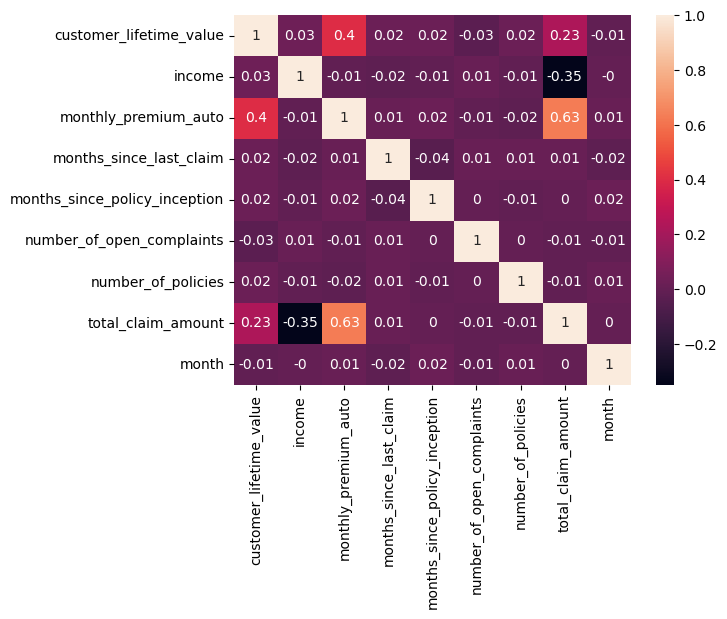

In [79]:
sns.heatmap(round(correlations_matrix,2), annot=True)
plt.show()

In [80]:
# After checking the correlation matrix, there is no highly correlated variables. No need to drop any of them.

# lab-customer-analysis-round-5

#### X-y split.

In [81]:
data1.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


In [82]:
y = data1['total_claim_amount']
X = data1.drop(['total_claim_amount'], axis=1)

In [83]:
X.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,A,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,A,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,0.0,7,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,A,1


#### Normalize (numerical).

In [84]:
X_num = X.select_dtypes(include = np.number)

In [85]:
X_num.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.082401,48.091934,0.361962,2.979193,1.466728
std,6885.081434,30359.195670,34.442532,9.787208,27.940675,0.890134,2.399359,0.498915
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,1.000000
50%,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,1.000000
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2.000000


In [86]:
from sklearn.preprocessing import MinMaxScaler 
MinMaxtransformer = MinMaxScaler()
MinMaxtransformer.fit(X_num)
x_normalized = MinMaxtransformer.transform(X_num)
print("The type of x_normalized is {} and the shape of the array is {}".format(type(x_normalized),x_normalized.shape))
x_normalized = pd.DataFrame(x_normalized,columns=X_num.columns) 
x_normalized.head()

The type of x_normalized is <class 'numpy.ndarray'> and the shape of the array is (10910, 8)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0
4,0.087527,0.236795,0.236287,0.400000,0.313131,0.0,0.750,0.0


In [87]:
x_normalized.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,0.075162,0.375434,0.135848,0.430926,0.485777,0.072392,0.247399,0.466728
std,0.084555,0.303650,0.145327,0.279635,0.282229,0.178027,0.299920,0.498915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.025992,0.000000,0.029536,0.200000,0.242424,0.000000,0.000000,0.000000
50%,0.047566,0.338199,0.092827,0.400000,0.484848,0.000000,0.125000,0.000000
75%,0.087130,0.622626,0.202532,0.657143,0.717172,0.000000,0.375000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# lab-customer-analysis-round-6

#### Train-test split.

In [93]:
from sklearn.model_selection import train_test_split
#since we can only apply linear regression model on numerical variables, I created X_train based on X_num.
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=50) 

In [94]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8728, 8)
(2182, 8)
(8728,)
(2182,)


In [95]:
X_train.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
month                              int64
dtype: object

#### Apply linear regression.

In [90]:
from sklearn.linear_model import LinearRegression

In [96]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Model Validation: 
- Description:
- R2.
- MSE.
- RMSE.
- MAE.

In [101]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import math

In [105]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [104]:
print(r2_train)
print(r2_test)

0.5138693253282856
0.5442557031455499


In [106]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

203.33608804049894

In [107]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred_test))
rmse

203.33608804049894

In [109]:
mae = mean_absolute_error(y_test, y_pred_test)
mae

146.32326909809407